<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 4.4 MB/s eta 0:00:00


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [4]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [5]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [6]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [7]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [8]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [9]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [10]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1659193307197, 24493.311336087452],
 [1659196893593, 24581.147996301323],
 [1659200545145, 24533.92236738088],
 [1659204099458, 24484.720577271193],
 [1659207702160, 24528.69610330859]]

Finally lets turn this data into a Pandas DataFrame.


In [15]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1659193307197,24493.311336
1,1659196893593,24581.147996
2,1659200545145,24533.922367
3,1659204099458,24484.720577
4,1659207702160,24528.696103
...,...,...
716,1661770851083,19858.789247
717,1661774623889,19816.147114
718,1661778143093,19963.716624
719,1661781834020,20101.002544


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [16]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data

,TimeStamp,Price,date
0,1659193307197,24493.311336,2022-07-30
1,1659196893593,24581.147996,2022-07-30
2,1659200545145,24533.922367,2022-07-30
3,1659204099458,24484.720577,2022-07-30
4,1659207702160,24528.696103,2022-07-30
...,...,...,...
716,1661770851083,19858.789247,2022-08-29
717,1661774623889,19816.147114,2022-08-29
718,1661778143093,19963.716624,2022-08-29
719,1661781834020,20101.002544,2022-08-29


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [14]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2022-07-30  23729.448125  24581.147996  24493.311336  23729.448125
1   2022-07-31  23288.617189  23858.138350  23653.459549  23288.617189
2   2022-08-01  22916.219055  23467.475085  23344.855867  23188.233857
3   2022-08-02  22754.248682  23412.928605  23304.157193  23115.382086
4   2022-08-03  22778.669545  23561.825256  23052.946433  23026.022874
5   2022-08-04  22526.435184  23165.072999  22860.420984  22639.315928
6   2022-08-05  22670.754974  23426.863033  22670.805467  23240.700575
7   2022-08-06  23163.585787  23289.635614  23225.036202  23199.689947
8   2022-08-07  22935.020076  23326.974064  22984.579531  23258.361517
9   2022-08-08  23197.603470  24185.790368  23197.603470  23815.756931
10  2022-08-09  23033.520503  23922.088572  23849.152632  23167.701362
11  2022-08-10  22826.073530  24058.487180  23203.680697  23927.586064
12  2022-08-11  23956.114928  24750.869106  23956.114928  24111.904875
13  2022-08-12  23687.145853  24242.726710  23950.900749  24235.476737
14  2022-08-13  24411.379872  24806.972863  24411.379872  24433.026805
15  2022-08-14  24306.625500  24988.449476  24439.405038  24367.764394
16  2022-08-15  24001.621672  24995.084224  24322.437555  24054.940243
17  2022-08-16  23748.937385  24201.106463  24179.014652  23919.737715
18  2022-08-17  23310.441133  24438.651145  23898.443545  23385.146665
19  2022-08-18  23283.007168  23544.996596  23372.850059  23376.626385
20  2022-08-19  21033.135191  23248.384228  23248.384228  21033.135191
21  2022-08-20  20945.833966  21337.446250  20945.833966  21174.255154
22  2022-08-21  21126.524600  21624.438126  21156.597468  21624.438126
23  2022-08-22  21014.941852  21615.761693  21615.761693  21217.879468
24  2022-08-23  21027.824239  21573.419189  21387.747115  21510.552870
25  2022-08-24  21210.506739  21753.125073  21553.278406  21519.846338
26  2022-08-25  21393.111816  21744.653715  21393.111816  21610.361315
27  2022-08-26  20657.160624  21743.888985  21618.009019  20662.200388
28  2022-08-27  19920.602665  20327.586597  20267.186423  20063.304191
29  2022-08-28  19920.049923  20068.799455  20053.734300  19946.601383
30  2022-08-29  19659.246706  20289.649577  19659.246706  20289.649577

Finally we are now ready to use plotly to create our Candlestick Chart.


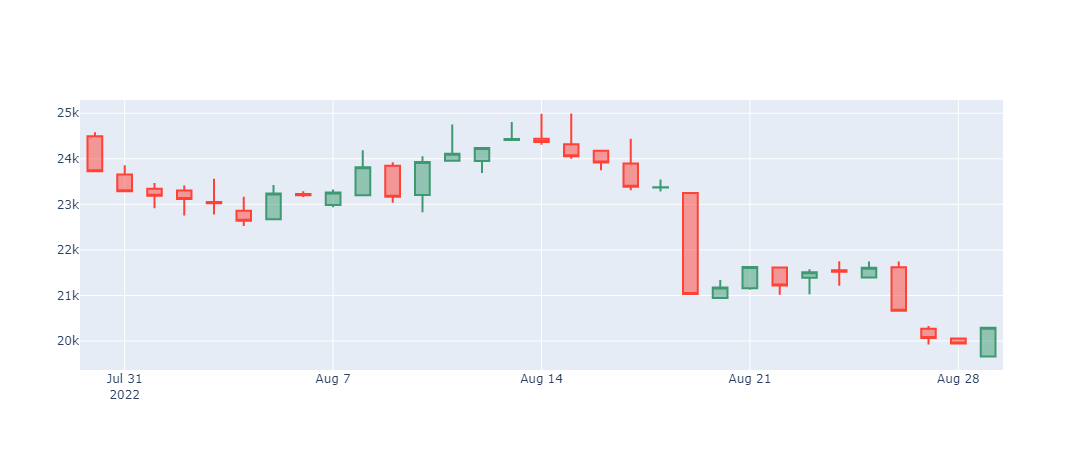

In [18]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
